In [30]:
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
import re

In [2]:
spam_df = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    header=None,
    names=["target", "message"],
    encoding="utf-8"
)

spam_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
train_data, test_data = train_test_split(
    spam_df,
    test_size=0.33,
    random_state=0,
    stratify=spam_df["target"]
)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 4484 to 1454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   3733 non-null   object
 1   message  3733 non-null   object
dtypes: object(2)
memory usage: 87.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 2757 to 4679
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   1839 non-null   object
 1   message  1839 non-null   object
dtypes: object(2)
memory usage: 43.1+ KB


In [8]:
spam_messages = (train_data["target"] == "spam").sum()
ham_messages = (train_data["target"] == "ham").sum()
ratio_spam_to_messages = spam_messages / len(train_data)

print(f"Number of spam messages = {spam_messages}")
print(f"Number of ham messages = {ham_messages}")
print(f"Ratio of spam messages / number of messages = {ratio_spam_to_messages}")

Number of spam messages = 500
Number of ham messages = 3233
Ratio of spam messages / number of messages = 0.1339405304045004


We will refer to "spam" as the "positive" class.  Describe a trivial classifier that could achieve at least an accuracy of 0.8.
1. How would this classifier make its classification?  
2. What accuracy would it get on your training data?
3. In addition to accuracy, what metric should you use to ensure that your classifier is better than a trivial one?  
3. What score would your trivial classifier get on this training data?

In [9]:
total = len(train_data)
accuracy = ham_messages / total
print(f"Always ham accuracy = {accuracy}\n")

y_train_trivial = train_data["target"]
y_pred_trivial = ["ham"] * len(train_data)

f1_trivial = f1_score(y_train_trivial, y_pred_trivial, pos_label="spam")

print(f"Always ham F1 SCORE for spam = {f1_trivial}")

Always ham accuracy = 0.8660594695954996

Always ham F1 SCORE for spam = 0.0


##### **SELECTED METRICS**

We can see that our dataset is imbalanced because we have way more ham messages than spam messages. A trivial classifier with accuracy greater than or equal to 0.8 could be a classifier that always predict "ham" for every message. Because ham is more than 80% of the messages, the accuracy will always be greater than or equal than 0.8.

If we let our ham messages be correctly classified, that is a classifier with high accuracy of 86% in this case, but it is not a good classifier because it would never predict spam. So the point being here is that we need to be careful because it can be misleading if we don't correctly choose how we are measuring how good our results are.

For better results, we need to measure performance on the positive class. There are different ways of dealing with this but for this example I believe that F1 score would be correct because it would give us a good balance between classifying spam and not getting too many good messages flagged as spam.

In addition to accuracy, we would choose to use the F1 score because it combines precision which is a measure of how many predicted spam were actually spam, and recall which means how many of the actual spam messages were detected, into a single number. The evaluation gives us a better way to handle the positive class which is the goal of the spam filter.

For this classifier, the F1 score would be 0 because the classifier never predicts messages as spam.

##### **BASELINES**

Choosing a trivial classifier that always predicts "ham" for every message would have:

**Accuracy**: equal to the ratio of ham messages in the training set (0.86 in this case).  
**F1 score for spam**: 0, because the classifier never predicts any message as spam. Precision = 0 and Recall = 0 for the spam class.

In [15]:
def custom_tokenizer(text):
    tokens = re.findall(r"[A-Za-z']+", text.lower())
    return tokens

vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    token_pattern=None,
    strip_accents='ascii'
)

X_train = vectorizer.fit_transform(train_data["message"])
X_test = vectorizer.transform(test_data["message"])

print(X_train)
# For each message in the rows we have columns representing a word. So (row, column) represents the count of a word that appeared in that message. (note to self)

y_train = train_data["target"]
y_test = test_data["target"]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 52390 stored elements and shape (3733, 6364)>
  Coords	Values
  (0, 5711)	1
  (0, 3201)	1
  (0, 3598)	1
  (0, 832)	1
  (0, 6135)	1
  (0, 3670)	1
  (0, 2232)	1
  (0, 5821)	1
  (0, 5542)	1
  (0, 5048)	1
  (0, 3796)	1
  (0, 3279)	1
  (0, 3445)	1
  (0, 6098)	2
  (0, 5889)	1
  (0, 2779)	2
  (0, 761)	1
  (0, 5514)	2
  (0, 6139)	1
  (0, 1368)	1
  (0, 5799)	1
  (0, 3821)	1
  (0, 5161)	1
  (0, 3439)	1
  (1, 5782)	1
  :	:
  (3730, 4573)	1
  (3730, 2070)	1
  (3730, 3143)	1
  (3730, 5464)	1
  (3730, 4095)	1
  (3730, 2142)	2
  (3730, 3791)	1
  (3730, 3288)	1
  (3730, 5979)	1
  (3730, 3315)	1
  (3730, 5775)	1
  (3730, 5108)	2
  (3730, 446)	1
  (3731, 2603)	1
  (3731, 3818)	1
  (3731, 6334)	1
  (3731, 2189)	1
  (3731, 807)	1
  (3731, 1969)	1
  (3731, 5040)	1
  (3731, 3843)	1
  (3732, 3731)	1
  (3732, 2787)	1
  (3732, 5251)	1
  (3732, 4158)	1


In [18]:
nb_classifier = MultinomialNB()

scoring = {
    "accuracy": "accuracy",
    "f1_spam": make_scorer(f1_score, pos_label="spam")
}

cross_validation_results = cross_validate(
    nb_classifier,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

accuracy_mean = cross_validation_results["test_accuracy"].mean()
accuracy_std = cross_validation_results["test_accuracy"].std()

f1_mean = cross_validation_results["test_f1_spam"].mean()
f1_std = cross_validation_results["test_f1_spam"].std()

# Bayesian Training Results

Accuracy TRAIN Cross Validation = 0.97776 +/- 0.00403
F1 spam TRAIN Cross Validation = 0.91981 +/- 0.01358

Training confusion matrix rows = true label, cols = predicted label
[[3215   18]
 [  18  482]]


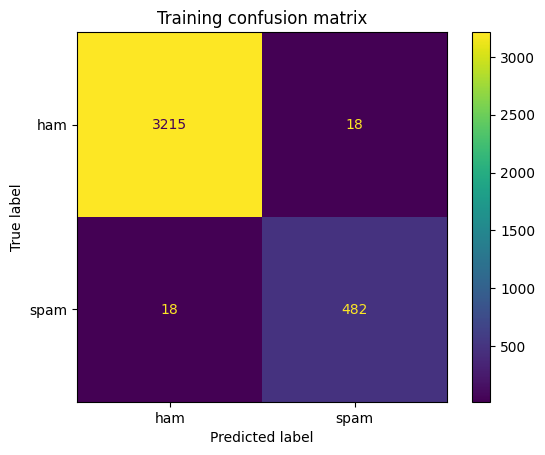

In [21]:
print(f"Accuracy TRAIN Cross Validation = {accuracy_mean:.5f} +/- {accuracy_std:.5f}")
print(f"F1 spam TRAIN Cross Validation = {f1_mean:.5f} +/- {f1_std:.5f}")

nb_classifier.fit(X_train, y_train)

y_train_pred = nb_classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred, labels=["ham", "spam"])
print("\nTraining confusion matrix rows = true label, cols = predicted label")
print(confusion_matrix_train)

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train, display_labels=["ham", "spam"])
display.plot()
plt.title("Training confusion matrix")
plt.show()

# Bayesian Testing Results


Accuracy on test = 0.98532
F1 spam on test = 0.94363

Test confusion matrix rows = true label, cols = predicted label
[[1586    6]
 [  21  226]]


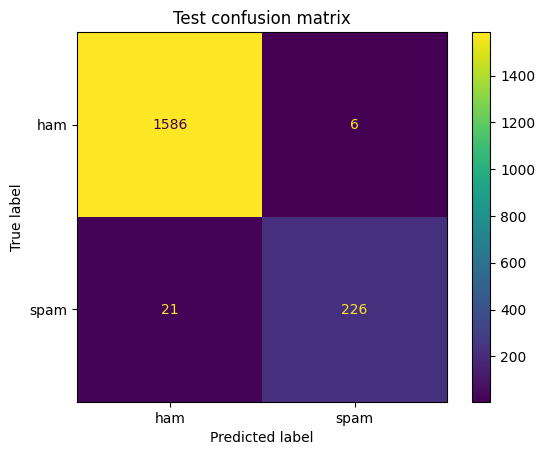

In [24]:
y_test_pred = nb_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label="spam")

print(f"Accuracy on test = {test_accuracy:.5f}")
print(f"F1 spam on test = {test_f1:.5f}")

confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=["ham", "spam"])
print("\nTest confusion matrix rows = true label, cols = predicted label")
print(confusion_matrix_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=["ham", "spam"])
disp.plot()
plt.title("Test confusion matrix")
plt.show()

## Discussion

1. Did your classifier perform better than one that always predicted "ham"?

My Naive Bayes classifier scored:

- Accuracy TRAIN Cross Validation = 0.97776 +/- 0.00403
- F1 spam TRAIN Cross Validation = 0.91981 +/- 0.01358
- TEST Accuracy on test = 0.98532
- TEST F1 spam on test = 0.94363


My Naive Bayes classifier has a higher F1 score for spam, and better accuracy. I believe it performs better than the trivial always ham classifier.

2. Were your testing metrics within the "bounds" set by your train/validation split (mean +/- std dev)?

For accuracy:

- 0.978 +/- 0.004 = [0.974, 0.982]

For F1 spam:

- 0.920 ± 0.014 = [0.906, 0.933]

The test accuracy and test F1 for spam are slightly above the bounds of these intervals, but very close. I would conclude that this looks pretty good because the difference is very minimal.

3. Would you use this "bare" classifier as a filter on your own messages?

The classifier achieves around 98.5% accuracy and F1 score of roughly 0.94 on spam, so it seems that it is a solid first draft of a classifier for spam filtering. I would consider using it to filter on my own messages, but would continue working on it to improve it further.



In [26]:
f1_scorer = make_scorer(f1_score, pos_label="spam")

train_sizes, train_scores, val_scores = learning_curve(
    nb_classifier,
    X_train,
    y_train,
    cv=5,
    scoring=f1_scorer,
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

## Bayesian Training Learning Curve

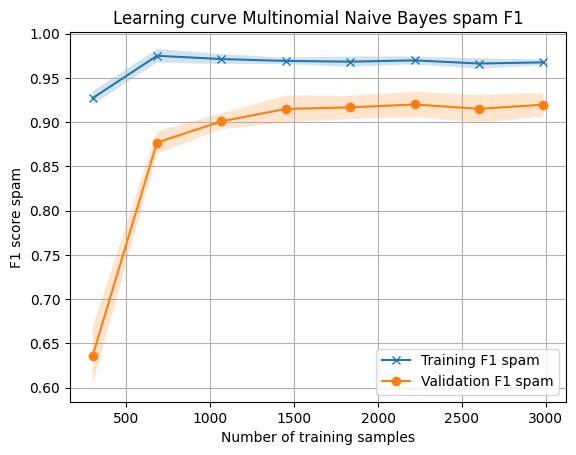

In [29]:
plt.figure()
plt.plot(train_sizes, train_mean, marker='x', label='Training F1 spam')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, val_mean, marker='o', label='Validation F1 spam')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel("Number of training samples")
plt.ylabel("F1 score spam")
plt.title("Learning curve Multinomial Naive Bayes spam F1")
plt.legend()
plt.grid(True)
plt.show()

# Discussion about Learning Curve

From this graph we can see that the classifier reaches most of its performance by around 1500 training examples. After that point, the validation F1 curve flattens out and additional data leads to only small improvements. The gap between the training and validation curves remains small and stable, which suggests that the Multinomial Naive Bayes classifier is close to its performance limit. Therefore, I believe that adding more data is not going to produce large gains in performance. If this classifier was part of an app, I don't think adding more data would make it improve very much.

# Tfidf and a logistic classifier


In [31]:
X_train_text = train_data["message"]
X_test_text = test_data["message"]
y_train = train_data["target"]
y_test = test_data["target"]

logistic_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=custom_tokenizer,
        token_pattern=None,
        strip_accents="ascii"
    )),
    ("clf", LogisticRegression(
        solver="liblinear",
        max_iter=1000
    ))
])

param_grid = {
    "clf__penalty": ["l1", "l2"],
    "clf__C": [0.01, 0.1, 1, 10],
    "tfidf__use_idf": [True, False]
}

f1_spam_scorer = make_scorer(f1_score, pos_label="spam")

grid = GridSearchCV(
    logistic_pipeline,
    param_grid=param_grid,
    scoring=f1_spam_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_text, y_train)

print("Best hyperparameters:", grid.best_params_)
print("Best CV F1 (spam):", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/jessicasampaio/ML/ml-notebooks/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jessicasampaio/ML/ml-notebooks/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'tfidf__use_idf': False}
Best CV F1 (spam): 0.9448582520030856


/Users/jessicasampaio/ML/ml-notebooks/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
best_logistic = grid.best_estimator_

scoring = {
    "accuracy": "accuracy",
    "f1_spam": f1_spam_scorer
}

cv_results_logistic = cross_validate(
    best_logistic,
    X_train_text,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

logit_acc_mean = cv_results_logistic["test_accuracy"].mean()
logit_acc_std = cv_results_logistic["test_accuracy"].std()

logit_f1_mean = cv_results_logistic["test_f1_spam"].mean()
logit_f1_std = cv_results_logistic["test_f1_spam"].std()


Logistic CV Accuracy: 0.98580 +/- 0.00107
Logistic CV F1 spam: 0.94486 +/- 0.00403

Logistic training confusion matrix rows = true, cols = predicted
[[3232    1]
 [  14  486]]


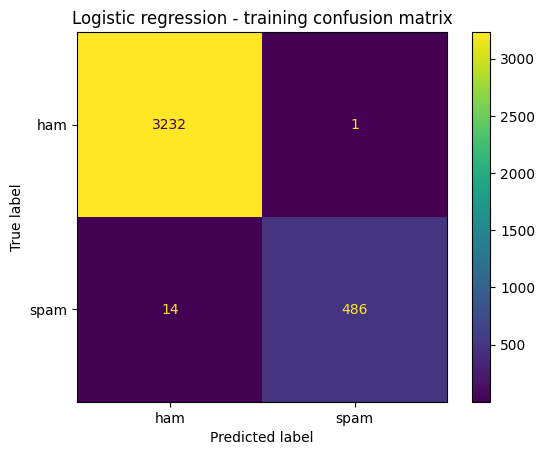

In [35]:
print(f"Logistic CV Accuracy: {logit_acc_mean:.5f} +/- {logit_acc_std:.5f}")
print(f"Logistic CV F1 spam: {logit_f1_mean:.5f} +/- {logit_f1_std:.5f}")

best_logistic.fit(X_train_text, y_train)

y_train_pred_logistic = best_logistic.predict(X_train_text)
confusion_matrix_train_logistic = confusion_matrix(y_train, y_train_pred_logistic, labels=["ham", "spam"])

print("\nLogistic training confusion matrix rows = true, cols = predicted")
print(confusion_matrix_train_logistic)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train_logistic, display_labels=["ham", "spam"])
disp.plot()
plt.title("Logistic regression - training confusion matrix")
plt.show()

# Logistic testing results

Logistic test accuracy: 0.98206
Logistic test F1 spam: 0.93023

Logistic test confusion matrix rows = true, cols = predicted
[[1586    6]
 [  27  220]]


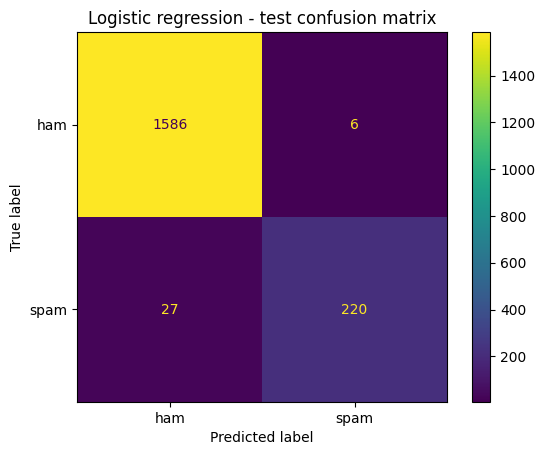

In [37]:
y_test_pred_logistic = best_logistic.predict(X_test_text)

test_acc_logit = accuracy_score(y_test, y_test_pred_logistic)
test_f1_logit = f1_score(y_test, y_test_pred_logistic, pos_label="spam")

print(f"Logistic test accuracy: {test_acc_logit:.5f}")
print(f"Logistic test F1 spam: {test_f1_logit:.5f}")

confusion_matrix_test_logistic = confusion_matrix(y_test, y_test_pred_logistic, labels=["ham", "spam"])
print("\nLogistic test confusion matrix rows = true, cols = predicted")
print(confusion_matrix_test_logistic)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test_logistic, display_labels=["ham", "spam"])
disp.plot()
plt.title("Logistic regression - test confusion matrix")
plt.show()

# Logistic learning curve

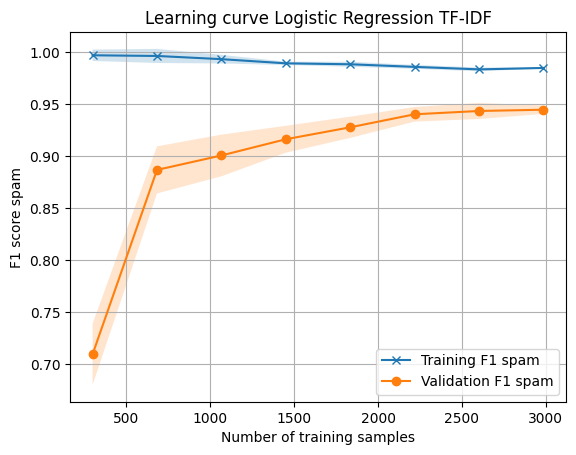

In [39]:
train_sizes, train_scores, val_scores = learning_curve(
    best_logistic,
    X_train_text,
    y_train,
    cv=5,
    scoring=f1_spam_scorer,
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker='x', label='Training F1 spam')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, val_mean, marker='o', label='Validation F1 spam')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel("Number of training samples")
plt.ylabel("F1 score spam")
plt.title("Learning curve Logistic Regression TF-IDF")
plt.legend()
plt.grid(True)
plt.show()

# Conclusions

For this project we compared:

- Multinomial Naive Bayes with CountVectorizer
- Logistic Regression with TF-IDF features

Both models were evaluated using the same two metrics:

- Accuracy
- F1 score for the spam class

### Comparison to baselines

A trivial classifier that always predicts "ham" achieved:
- Accuracy = 0.86
- F1 spam = 0

Both Naive Bayes and Logistic Regression greatly outperform this baseline, with much higher accuracy and non-zero F1 scores for spam.

### Naive Bayes vs Logistic Regression

Naive Bayes CountVectorizer
  - TRAIN CV accuracy = 0.978 +/- 0.004
  - TRAIN CV F1 spam = 0.920 +/- 0.014
  - Test accuracy = 0.985
  - Test F1 spam = 0.943

Logistic Regression TF-IDF
  - TRAIN CV accuracy = 0.98580 +/- 0.00107
  - TRAIN CV F1 spam = 0.94486 +/- 0.00403
  - Test accuracy = 0.98206
  - Test F1 spam = 0.93023

From the cross-validation results, Logistic Regression with TF-IDF performs better: it has higher mean accuracy and F1 for spam, with smaller standard deviations.

On the held out test set, Naive Bayes achieves slightly higher accuracy and F1 for spam than Logistic Regression. However, these differences are small and within the range suggested by our experiments, so they may be due to the given test split rather than a systematic advantage.

Overall, both models are good spam detectors and clearly better than the trivial always ham classifier. The confusion matrices for both models show that
most spam messages are correctly identified as spam. Only a small number of ham messages are incorrectly flagged as spam.

In conclusion, Logistic Regression with TF-IDF appears slightly stronger in cross-validation, while Naive Bayes performs slightly better on this specific test set. In practice, their performance is very similar, and both are effective spam filters.

### Usefulness of additional labeled data

The learning curves for both models show that performance improves with small training sizes and then begins to plateau. For Naive Bayes, performance stabilizes around 1500 training examples. For Logistic Regression, it stabilizes a little over 2000 examples.

This suggests that additional labeled data might still help with small improvements, but large gains in performance are unlikely from just adding more of the same data.

Therefore, both classifiers can be considered good spam filters. In these experiments, Logistic Regression with TF-IDF is slightly better according to cross-validation, while Naive Bayes is slightly better on the final test set. Overall, their performance is very close, and both clearly outperform the trivial baseline.